TP DE MACHINE LEARNING !!!

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('WineQT.csv')
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.4             0.700         0.00             1.9      0.076  \
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

VISUALISATION DES DONNEES

In [66]:
import numpy as np
import matplotlib.pyplot as plt

d=[df["alcohol"],df["quality"]]

x=np.transpose(np.matrix(d))
y=[]
for loop in range(len(x)):
    #on considère comme bon un vin dont alcohol + qualité^2 > 11+5^2
    if(1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5):
        y.append(1)
    else:
        y.append(0)

print(x)
print(y) 

[[ 9.4  5. ]
 [ 9.8  5. ]
 [ 9.8  5. ]
 ...
 [10.5  5. ]
 [11.2  6. ]
 [10.2  5. ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [67]:
def plot_data(X, y, ax, pos_label="y=1", neg_label="y=0", s=80, loc='best' ):
    """ plots logistic data with two axis """
    # Find Indices of Positive and Negative Examples
    pos=[]
    neg=[]
    idpos=[]
    idneg=[]
    for loop in range(len(y)):
        if(y[loop]==1):
            idpos.append(X[loop,0])
            pos.append(X[loop,1])
        else:
            idneg.append(X[loop,0])
            neg.append(X[loop,1])

    # Plot examples
    ax.scatter(idpos, pos, marker='x', s=s, c = 'red', label=pos_label)
    ax.scatter(idneg, neg, marker='o', s=s, label=neg_label, facecolors='none', edgecolors='blue', lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

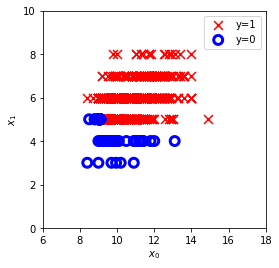

In [68]:


fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x, y, ax)

ax.axis([6, 18, 0, 10])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

LOGISTIC REGRESSION


In [69]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

[34.4 34.8 34.8 ... 35.5 47.2 35.2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

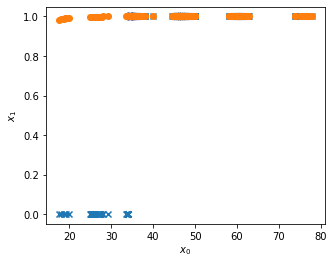

In [70]:
x_plot=[]
for loop in range(len(x)):
    x_plot.append(x[loop,0]+x[loop,1]*x[loop,1])
x_plot=np.asarray(x_plot)

y_train = y
print(x_plot)
print(y_train)
w_in = 0.4
b_in = -3

z=x_plot*w_in +b_in


fig,ax = plt.subplots(1,1,figsize=(5,4))

ax.scatter(x_plot,y_train,marker="x")
ax.scatter(x_plot,sigmoid(z))
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()



BOUNDARY

[   0    1    2 ... 1197 1198 1199]


/tmp/ipykernel_56623/2525839103.py:7: RuntimeWarning: invalid value encountered in sqrt
  x1 = np.sqrt(11+5*5-x0*1.2)


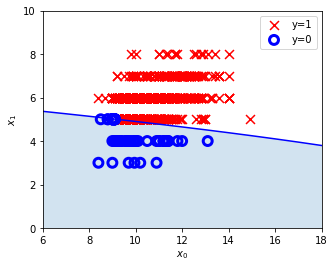

In [71]:
# Choose values between 0 and 6
x0 = np.arange(1200)
print(x0)
import math
#1.2*x[loop,0]+x[loop,1]*x[loop,1]>11+5*5
#ici b=-11+5*5 w0 = 1,2 w1=1
x1 = np.sqrt(11+5*5-x0*1.2)
fig,ax = plt.subplots(1,1,figsize=(5,4))
# Plot the decision boundary
ax.plot(x0,x1, c="b")
ax.axis([6, 18, 0, 10])

# Fill the region below the line
ax.fill_between(x0,x1, alpha=0.2)

# Plot the original data
plot_data(x,y,ax)
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
plt.show()

, Logistic Loss

In [72]:
def compute_cost_logistic(X, y, w, b):
    """
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        #cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
        if(y[i]==1):
                cost +=  -np.log(f_wb_i)
        elif(y[i]==0):
                cost +=  -np.log(1-f_wb_i)
             
    cost = cost / m
    return cost